In [199]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import linear_model
from sklearn import kernel_ridge

Wine Quality Data Set from UCI Machine Learning Lab

There are two datasets that provide information on samples of red and white variants of the Portuguese "Vinho Verde" wine. Each sample of wine was rated for quality by wine experts and examined with physicochemical tests.  Only data on these physicochemical properties and quality ratings are available (e.g. there is no data about grape types, wine brand,wine selling price, etc . )

Attributes in Each Dataset:

Physicochemical Properties

Fixed Acidity
Volatile Acidity
Citric Acid
Residual Sugar
Chlorides
Free Sulfur Dioxide
Total Sulfur Dioxide
Density
pH
Sulphates
Alcohol
Quality Rating

Quality - Score between 0 and 10 (median of at least 3 evaluations made by wine experts)

Data Analysis

In [200]:
red = pd.read_csv('winequality-red.csv') # , low_memory=False, sep=';')
white = pd.read_csv('winequality-white.csv') # ', low_memory=False, sep=';')

In [201]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [202]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [203]:
# Function to select red or white dataset
def call(function):
    print('\nRed Wine\n')
    function(red)
    print('\nWhite Wine\n')
    function(white)

In [204]:
# Remove spaces from column names
def rm(wine_set):
    wine_set.columns = [x.strip().replace(' ','_') for x in wine_set.columns]
call(rm)



Red Wine


White Wine



In [205]:
red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [206]:
white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6



Red Wine



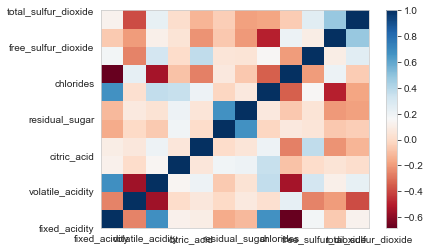


White Wine



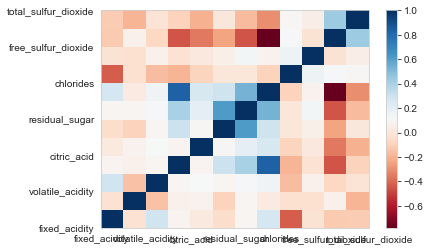

In [207]:
# Covarience matrix
def covmax(wine_set):
    cov_mat = wine_set.corr(method = 'pearson')
    fig = plt.figure().add_subplot(111)
    plt.pcolor(cov_mat, cmap = 'RdBu')
    plt.colorbar()
    fig.set_xticklabels(wine_set.columns)
    fig.set_yticklabels(wine_set.columns)
    plt.show()
call(covmax)

In [208]:
# Add a column 'quality_mark'
def add_categ_quality(wine_set):
    low = wine_set[wine_set['quality'] <= 5]
    medium = wine_set[(wine_set['quality'] == 6) | (wine_set['quality'] == 7)]
    high = wine_set[wine_set['quality'] > 7]
    
    low['quality_mark'] = 'low'
    medium['quality_mark'] = 'medium'
    high['quality_mark'] = 'high'
    
    frames = [low, medium, high]
    return pd.concat(frames)

Hypothesis Testing and ANOVA

In [209]:
# Calculating the F-statistics and associated p-value
def anova(wine_set):
    prepared_data = add_categ_quality(wine_set)
    model1 = smf.ols(formula='total_sulfur_dioxide ~ C(quality_mark)', data = prepared_data)
    results1 = model1.fit()
    print(results1.summary())
    
    sub = prepared_data[['total_sulfur_dioxide', 'quality_mark']]
    print("\nMeans for total sulfur dioxide by quality marks of wine \n")
    print(sub.groupby('quality_mark').mean())
    print('\nStandard deviation for total sulfur dioxide by quality marks of wine \n')
    print(sub.groupby('quality_mark').std(), '\n')
    
    # Perform Post hoc test
    mc1 = multi.MultiComparison(sub['total_sulfur_dioxide'], sub['quality_mark'])
    res1 = mc1.tukeyhsd()
    print(res1.summary())
    
call(anova)


Red Wine

                             OLS Regression Results                             
Dep. Variable:     total_sulfur_dioxide   R-squared:                       0.054
Model:                              OLS   Adj. R-squared:                  0.053
Method:                   Least Squares   F-statistic:                     45.71
Date:                  Thu, 24 Mar 2022   Prob (F-statistic):           4.97e-20
Time:                          13:10:15   Log-Likelihood:                -7809.7
No. Observations:                  1599   AIC:                         1.563e+04
Df Residuals:                      1596   BIC:                         1.564e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [210]:
def score_linearRegression(X_train, X_test, y_train, y_test):
    linearRegression = linear_model.LinearRegression();
    linearRegression.fit(X_train, y_train)
    return linearRegression.score(X_test, y_test)

def score_ridgeRegression(X_train, X_test, y_train, y_test):
    ridgeRegression = linear_model.Ridge(alpha=1)
    ridgeRegression.fit(X_train, y_train)
    return ridgeRegression.score(X_test, y_test)

def score_kernelRegression(X_train, X_test, y_train, y_test):
    kernelRegression = kernel_ridge.KernelRidge(alpha=1)
    kernelRegression.fit(X_train, y_train)
    return kernelRegression.score(X_test, y_test)
    
def score_svRegression(X_train, X_test, y_train, y_test):
    svRegression = svm.SVR()
    svRegression.fit(X_train, y_train)
    return svRegression.score(X_test, y_test)
    
def score_lassoRegression(X_train, X_test, y_train, y_test):
    lassoRegression = linear_model.Lasso(alpha=1)
    lassoRegression.fit(X_train, y_train)
    return lassoRegression.score(X_test, y_test)

def score_elasticRegression(X_train, X_test, y_train, y_test):
    elasticRegression = linear_model.ElasticNet(alpha=1)
    elasticRegression.fit(X_train, y_train)
    return elasticRegression.score(X_test, y_test)

Feature Selection using Pearson's Correlation

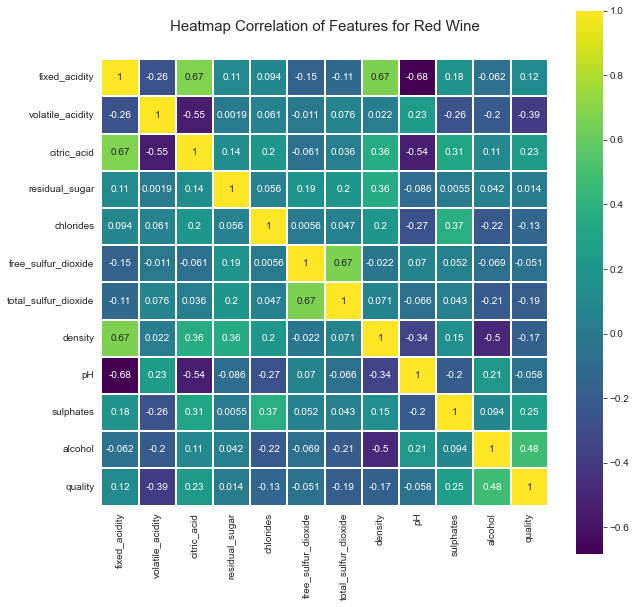

In [211]:
# Pearson's Correlation Matrix using colormap
# red wine 
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Heatmap Correlation of Features for Red Wine', y=1.05, size=15)
sns.heatmap(red.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

Points to note:
    
Pairs with a considerable positive correlation are:
    
density and fixed acidity (Magnitude = 0.67)
citric acid and fixed acidity (Magnitude = 0.67)
free sulphur dioxide and total sulphur dioxide (Magnitude = 0.67)

Pairs with a considerable negative correlation are:
    
pH and fixed acidity (Magnitude = -0.68)
Citric acid and volatile acidity (Magnitude = -0.55)
pH and citric acid (Magnitude = -0.54)
density and alcohol (Magnitude = -0.5)

In [107]:
def score_allRegression(X_train, X_test, y_train, y_test):
    name = ["Linear Regression: ", "Ridge Regression: ", "Kernel Regression: ", "SV Regression: ", "Lasso Regression: ", "Elastic Regression: "]
    return [
        name[0] + str(score_linearRegression(X_train, X_test, y_train, y_test)),
        name[1] + str(score_ridgeRegression(X_train, X_test, y_train, y_test)),
        name[2] + str(score_kernelRegression(X_train, X_test, y_train, y_test)),
        name[3] + str(score_svRegression(X_train, X_test, y_train, y_test)),
        name[4] + str(score_lassoRegression(X_train, X_test, y_train, y_test)),
        name[5] + str(score_elasticRegression(X_train, X_test, y_train, y_test)) ]

In [108]:
def result_feature(X_train, X_test, y_train, y_test):
    return score_allRegression(X_train, X_test, y_train, y_test)

In [109]:
# Feature selection using Pearson's Correlation

# red wine (alcohol, volatile acid, sulphate, citric acid)
X = red.filter(items=['alcohol', 'volatile acid' ,'sulphates', 'citric acid'])
Y = red['quality']
# red wine train_test_split
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X, Y, test_size=0.2)
print("Features chosen for Pearson's Correlation: [alcohol, volatile acid, sulphates, citric acid]")
print("red wine result using Pearon's Correlation: ")
result_feature(X_red_train, X_red_test, y_red_train, y_red_test)

Features chosen for Pearson's Correlation: [alcohol, volatile acid, sulphates, citric acid]
red wine result using Pearon's Correlation: 


['Linear Regression: 0.21963628505030064',
 'Ridge Regression: 0.2189649676234493',
 'Kernel Regression: 0.18591082870848963',
 'SV Regression: 0.19827542430751754',
 'Lasso Regression: -0.004272541028782717',
 'Elastic Regression: -0.004272541028782717']

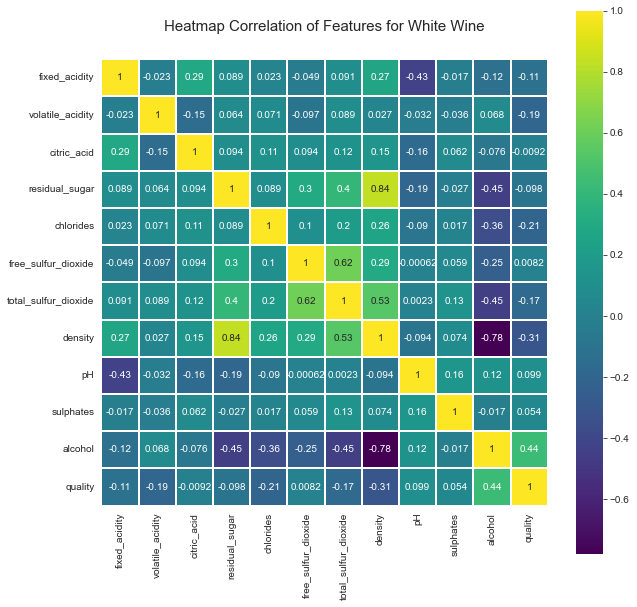

In [212]:
# Pearson's Correlation Matrix using colormap
# white wine 
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Heatmap Correlation of Features for White Wine', y=1.05, size=15)
sns.heatmap(white.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

Points to note:
Pairs with a considerable positive correlation are:
    
density and residual sugar ( Magnitude = 0.84)
total sulfur dioxide and free sulfur dioxide (Magnitude = 0.62)
density and total sulfur dioxide (Magnitude = 0.53)


Pairs with a considerable negative correlation are:

fixed acidity and ph (Magnitude -0.43)    
alchol and residual sugar  (Magnitude -0.45)
density and alcohol (Magnitude = -0.78)

In [213]:
# Feature selection using Pearson's Correlation

# white wine (alcohol, volatile acid, sulphate, citric acid)
X = white.filter(items=['alcohol', 'volatile acid' ,'sulphates', 'citric acid'])
Y = white['quality']
# white wine train_test_split
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X, Y, test_size=0.2)
print("Features chosen for Pearson's Correlation: [alcohol, volatile acid, sulphates, citric acid]")
print("white wine result using Pearon's Correlation: ")
result_feature(X_white_train, X_white_test, y_white_train, y_white_test)

Features chosen for Pearson's Correlation: [alcohol, volatile acid, sulphates, citric acid]
white wine result using Pearon's Correlation: 


['Linear Regression: 0.1792475632097158',
 'Ridge Regression: 0.17928780786401743',
 'Kernel Regression: 0.10863863881943714',
 'SV Regression: 0.1745127597818219',
 'Lasso Regression: -0.0013147304490468414',
 'Elastic Regression: -0.0013147304490468414']


Red Wine



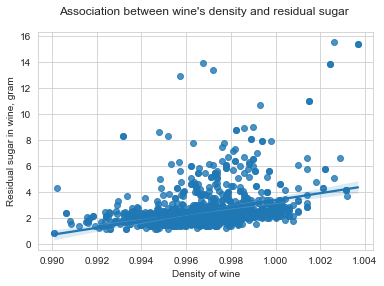

(0.35528337098337615, 9.013041728302969e-49)

White Wine



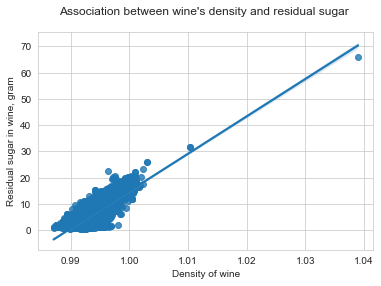

(0.8389664549045833, 0.0)


In [214]:
# Pearson Correlation
def pearson(wine_set):
    scat1 = seaborn.regplot(x = "density", y = "residual_sugar", fit_reg = True, data = wine_set)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar \n")
    plt.show()

    print(scipy.stats.pearsonr(wine_set['density'], wine_set["residual_sugar"]))

call(pearson)


Red Wine

association between wine`s density and residual sugar for wines 
of `low` quality
(0.40512747741473676, 9.3299903047261e-31)

of `medium` quality
(0.33017251719442, 9.754348168745725e-23)

of `high` quality
(0.5797231322874947, 0.01167920534189386)


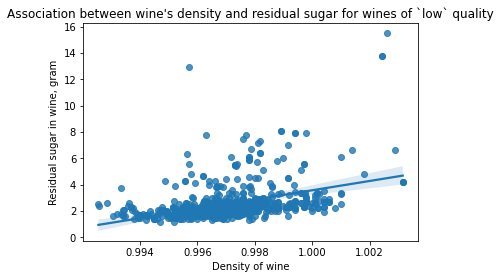

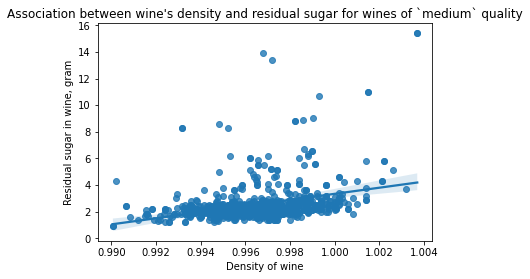

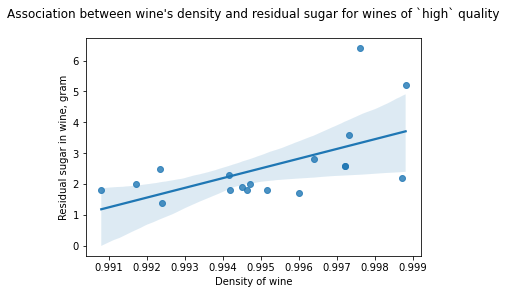


White Wine

association between wine`s density and residual sugar for wines 
of `low` quality
(0.8796644895829153, 0.0)

of `medium` quality
(0.8458419941200982, 0.0)

of `high` quality
(0.8210870208105543, 3.2743806268835255e-45)


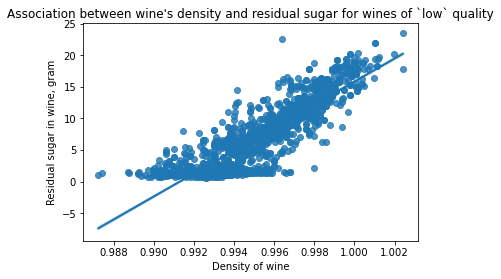

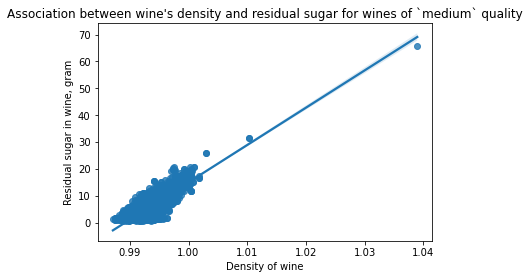

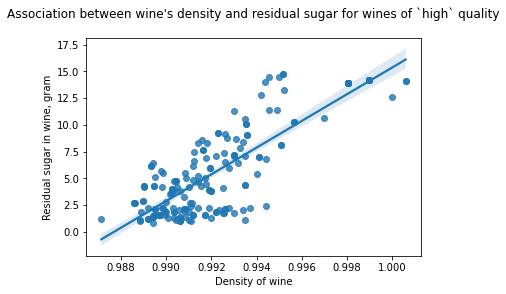

In [113]:
# Exploring Statistical Interactions
def explore(wine_set):
    low = wine_set[wine_set['quality'] <= 5]
    medium = wine_set[(wine_set['quality'] == 6) | (wine_set['quality'] == 7)]
    high = wine_set[wine_set['quality'] > 7]

    print('association between wine`s density and residual sugar for wines \nof `low` quality')
    print(scipy.stats.pearsonr(low['density'], low["residual_sugar"]))
    print('\nof `medium` quality')
    print(scipy.stats.pearsonr(medium['density'], medium["residual_sugar"]))
    print('\nof `high` quality')
    print(scipy.stats.pearsonr(high['density'], high["residual_sugar"]))

    scat0 = seaborn.regplot(x="density", y="residual_sugar", fit_reg=True, data=low)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `low` quality")
    plt.show()

    scat0 = seaborn.regplot(x="density", y="residual_sugar", fit_reg=True, data=medium)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `medium` quality")
    plt.show()

    scat0 = seaborn.regplot(x="density", y="residual_sugar", fit_reg=True, data=high)
    plt.xlabel("Density of wine")
    plt.ylabel("Residual sugar in wine, gram")
    plt.title("Association between wine's density and residual sugar for wines of `high` quality\n")
    plt.show()

call(explore)

In [114]:
# wine_set.iloc[:,5]
def basicInfo(wine_set):
    print(len(wine_set))
    print(len(wine_set.columns))
    print(list(wine_set.columns.values))
    print(wine_set.iloc[:10,:4])
    print('\n')
    print("--------------describe the data-----------------")
    print('\n')
    print(wine_set.describe())

call(basicInfo)


Red Wine

1599
12
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar
0            7.4              0.70         0.00             1.9
1            7.8              0.88         0.00             2.6
2            7.8              0.76         0.04             2.3
3           11.2              0.28         0.56             1.9
4            7.4              0.70         0.00             1.9
5            7.4              0.66         0.00             1.8
6            7.9              0.60         0.06             1.6
7            7.3              0.65         0.00             1.2
8            7.8              0.58         0.02             2.0
9            7.5              0.50         0.36             6.1


--------------describe the data-----------------


       fixed_acidity  volatile_acidity  c

Data Exploration

In [115]:
# print frequency distributions of wines' quality 
def frequencyDists(wine_set):
    print("This is the frequency distribution of the wines' quality.")
    print(wine_set.groupby("quality").size()*100 / len(wine_set))
    print()

call(frequencyDists)


Red Wine

This is the frequency distribution of the wines' quality.
quality
3     0.625391
4     3.314572
5    42.589118
6    39.899937
7    12.445278
8     1.125704
dtype: float64


White Wine

This is the frequency distribution of the wines' quality.
quality
3     0.408330
4     3.327889
5    29.746835
6    44.875459
7    17.966517
8     3.572887
9     0.102082
dtype: float64



In [116]:
# print quartile split of the quality variable 
def quartileSplit(wine_set):
    print("This is the quartile split of the wines' quality. I-st column contains the intervals of wines' quality;")
    print("II-nd - the number of wine samples with the quality in the corresponding interval.")
    wine_set["quality_quart"] = pd.qcut(wine_set["quality"], 3)
    print(wine_set.groupby("quality_quart").size())

call(quartileSplit)


Red Wine

This is the quartile split of the wines' quality. I-st column contains the intervals of wines' quality;
II-nd - the number of wine samples with the quality in the corresponding interval.
quality_quart
(2.999, 5.0]    744
(5.0, 6.0]      638
(6.0, 8.0]      217
dtype: int64

White Wine

This is the quartile split of the wines' quality. I-st column contains the intervals of wines' quality;
II-nd - the number of wine samples with the quality in the corresponding interval.
quality_quart
(2.999, 5.0]    1640
(5.0, 6.0]      2198
(6.0, 9.0]      1060
dtype: int64



Red Wine



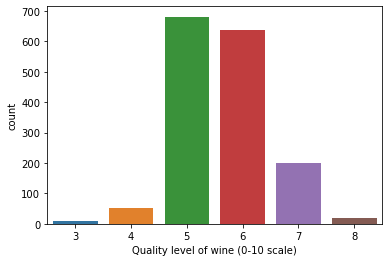


White Wine



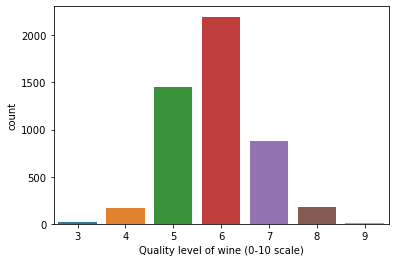

In [117]:
# Visualization  with countplots and factorplots
def countplots(wine_set):
    wine_set["quality"] = pd.Categorical(wine_set["quality"])
    seaborn.countplot(x="quality", data=wine_set)
    plt.xlabel("Quality level of wine (0-10 scale)")
    plt.show()

call(countplots)


Red Wine



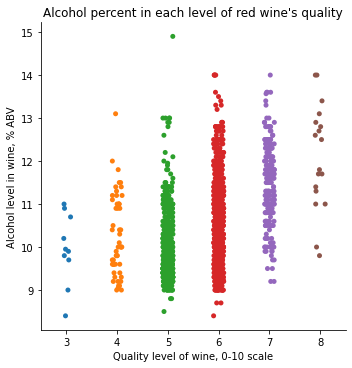


White Wine



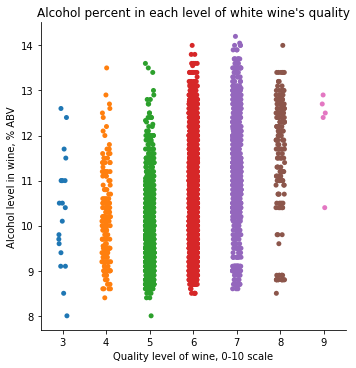

In [118]:
def factorplots(wine_set):
    seaborn.factorplot(x="quality", y="alcohol", data=wine_set, kind="strip")
    plt.xlabel("Quality level of wine, 0-10 scale")
    plt.ylabel("Alcohol level in wine, % ABV")
    if wine_set.equals(red):
        plt.title("Alcohol percent in each level of red wine's quality")
    else:
        plt.title("Alcohol percent in each level of white wine's quality")
    plt.show()

call(factorplots)

Model Building

In [119]:
import sklearn
print (sklearn.__version__)

1.0.2


In [120]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

In [121]:
import sklearn
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.model_selection import learning_curve, GridSearchCV

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import time
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import sklearn
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
import operator
from sklearn import preprocessing
from sklearn.linear_model import LassoLarsCV
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

Logistic Regression

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [24]:
def log_regression(wine_set):
    # local variable to identify if the wine_set red or white
    w = wine_set


    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)


    # split into training and testing sets
    predictors = wine_set[["sulphates", 'alcohol']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data
    classifier = LogisticRegression()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

     # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

print('----------------Logistic Regression------------------------')
call(log_regression)

----------------Logistic Regression------------------------

Red Wine

Confusion Matrix:
 [[211  97]
 [102 230]]
Accuracy: 0.6890625
Score: 0.6890625
RMSE: 0.5576177005798866

White Wine

Confusion Matrix:
 [[ 277  340]
 [ 240 1103]]
Accuracy: 0.7040816326530612
Score: 0.7040816326530612
RMSE: 0.5439837932759934


In [25]:
from sklearn.tree import DecisionTreeClassifier


In [26]:
from sklearn.metrics import mean_squared_error

In [27]:
def decis_tree(wine_set):
    # local variable to identify if the wine_set red or white
    w = wine_set


    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)


    # split into training and testing sets
    predictors = wine_set[["residual_sugar", 'alcohol']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

    # build model on training data
    classifier = DecisionTreeClassifier()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

     # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

print('----------------Decision Tree------------------------')
call(decis_tree)

----------------Decision Tree------------------------

Red Wine

Confusion Matrix:
 [[227  69]
 [139 205]]
Accuracy: 0.675
Score: 0.675
RMSE: 0.570087712549569

White Wine

Confusion Matrix:
 [[386 268]
 [308 998]]
Accuracy: 0.7061224489795919
Score: 0.7061224489795919
RMSE: 0.5421047417431508


KNN

In [28]:
def knn(wine_set):
    
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # split into training and testing sets
    predictors = wine_set[["residual_sugar", 'alcohol']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
    
    
    # build model on training data
    classifier = KNeighborsClassifier()
    classifier = classifier.fit(pred_train, tar_train)

    predictions = classifier.predict(pred_test)

    # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictions))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictions))
    
    print ('Score:', classifier.score(pred_test, tar_test))
    print ('RMSE:', mean_squared_error(predictions, tar_test) ** 0.5)

    
print('----------------KNN------------------------')
call(knn)

----------------KNN------------------------

Red Wine

Confusion Matrix:
 [[173 136]
 [103 228]]
Accuracy: 0.6265625
Score: 0.6265625
RMSE: 0.6110953280790158

White Wine

Confusion Matrix:
 [[ 337  320]
 [ 219 1084]]
Accuracy: 0.725
Score: 0.725
RMSE: 0.5244044240850758


In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB


In [30]:
def naive(wine_set):
   
    # recode quality (response variable) into 2 groups: 0:{3,4,5}, 1:{6,7,8,9}
    recode = {3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)

    # split into training and testing sets
    predictors = wine_set[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                           'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]
    targets = wine_set.quality_c

    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)
    

    classifier = GaussianNB()
    classifier.fit(pred_train, tar_train)
    predictionsG = classifier.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('Confusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsG))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsG))
    print("Gaus:" + str(classifier.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsG, tar_test)
    print('MSE:',mse ** 0.5)

    classifierm = MultinomialNB()
    classifierm.fit(pred_train, tar_train)
    predictionsM = classifierm.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('\nConfusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsM))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsM))
    print("Multi:" + str(classifierm.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsM, tar_test)
    print('MSE:',mse ** 0.5)

    classifierb = BernoulliNB()
    classifierb.fit(pred_train, tar_train)
    predictionsB = classifierb.predict(pred_test)
    # print the confusion matrix and accuracy of the model
    print('\nConfusion Matrix:\n',sklearn.metrics.confusion_matrix(tar_test, predictionsB))
    print('Accuracy:',sklearn.metrics.accuracy_score(tar_test, predictionsB))
    print("Bernoulli:" + str(classifierb.score(pred_test, tar_test)))
    mse = mean_squared_error(predictionsB, tar_test)
    print('MSE:',mse ** 0.5)
    

print('----------------Naive Bayes------------------------')
call(naive)

----------------Naive Bayes------------------------

Red Wine

Confusion Matrix:
 [[215  87]
 [ 84 254]]
Accuracy: 0.7328125
Gaus:0.7328125
MSE: 0.5169018282033834

Confusion Matrix:
 [[142 160]
 [ 91 247]]
Accuracy: 0.6078125
Multi:0.6078125
MSE: 0.6262487524937674

Confusion Matrix:
 [[ 26 276]
 [ 21 317]]
Accuracy: 0.5359375
Bernoulli:0.5359375
MSE: 0.6812213296719356

White Wine

Confusion Matrix:
 [[ 363  279]
 [ 281 1037]]
Accuracy: 0.7142857142857143
Gaus:0.7142857142857143
MSE: 0.5345224838248488

Confusion Matrix:
 [[ 268  374]
 [ 279 1039]]
Accuracy: 0.6668367346938775
Multi:0.6668367346938775
MSE: 0.5772029671667692

Confusion Matrix:
 [[   3  639]
 [   4 1314]]
Accuracy: 0.6719387755102041
Bernoulli:0.6719387755102041
MSE: 0.5727662913351272


In [31]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LassoLarsCV

----------------Lasso Regression------------------------

Red Wine

Predictors and their regression coefficients:
density : -0.020095347815241756
alcohol : 0.2931274859362408
sulphates : 0.13551717868691174
pH : -0.02780256301341268
volatile_acidity : -0.1903129755374199
chlorides : -0.08393917245157224
fixed_acidity : 0.0
citric_acid : 0.0
residual_sugar : 0.017520691488964846
free_sulfur_dioxide : 0.0
total_sulfur_dioxide : -0.0792821204686808

Alpha: 0.00024799947518916676


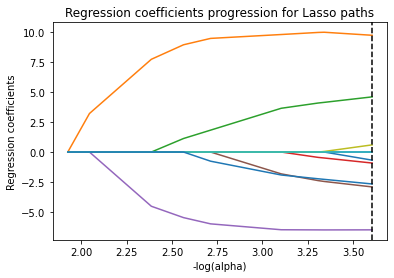

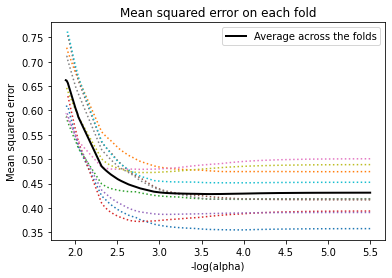


Mean squared error for training data: 0.4203875908920116
Mean squared error for test data: 0.4218140045517258

R-square for training data: 0.3629641127620279
R-square for test data: 0.33280737417125994

White Wine

Predictors and their regression coefficients:
density : -0.24939511143228427
alcohol : 0.3303025577975121
sulphates : 0.06748773072115567
pH : 0.05785746749830216
volatile_acidity : -0.19002207866367504
chlorides : -0.004067080798942665
fixed_acidity : 0.0
citric_acid : 0.0
residual_sugar : 0.2949812850759567
free_sulfur_dioxide : 0.055207920365494954
total_sulfur_dioxide : -0.013006735328913523

Alpha: 9.211601493058701e-05


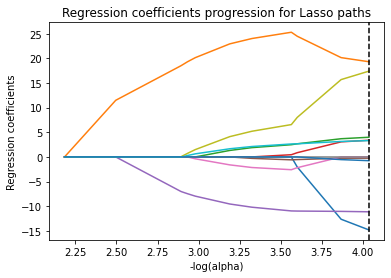

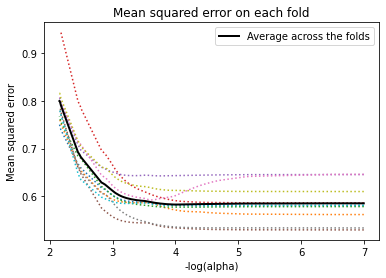


Mean squared error for training data: 0.5763917424436985
Mean squared error for test data: 0.5387294766360473

R-square for training data: 0.2784951594704027
R-square for test data: 0.2816590155332763


In [32]:
def lasso_regr(wine_set):

    pred = wine_set[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 'fixed_acidity',
                    'citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]
    predictors = pred.copy()
    targets = wine_set.quality

    # standardize predictors to have mean=0 and sd=1
    predictors = pd.DataFrame(preprocessing.scale(predictors))
    predictors.columns = pred.columns
    # print(predictors.head())

    # split into training and testing sets
    pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.3, random_state=123)

    # specify the lasso regression model
    model = LassoLarsCV(cv=10, precompute=False).fit(pred_train, tar_train)

    print('Predictors and their regression coefficients:')
    d = dict(zip(predictors.columns, model.coef_))
    for k in d:
        print(k, ':', d[k])

    # plot coefficient progression
    m_log_alphas = -np.log10(model.alphas_)
    # ax = plt.gca()
    plt.plot(m_log_alphas, model.coef_path_.T)
    print('\nAlpha:', model.alpha_)
    plt.axvline(-np.log10(model.alpha_), linestyle="dashed", color='k', label='alpha CV')
    plt.ylabel("Regression coefficients")
    plt.xlabel("-log(alpha)")
    plt.title('Regression coefficients progression for Lasso paths')
    plt.show()

    # plot mean squared error for each fold
    m_log_alphascv = -np.log10(model.cv_alphas_)
    plt.plot(m_log_alphascv, model.mse_path_, ':')
    plt.plot(m_log_alphascv, model.mse_path_.mean(axis=-1), 'k', label='Average across the folds', linewidth=2)
    plt.legend()
    plt.xlabel('-log(alpha)')
    plt.ylabel('Mean squared error')
    plt.title('Mean squared error on each fold')
    plt.show()

    # Mean squared error from training and test data
    train_error = mean_squared_error(tar_train, model.predict(pred_train))
    test_error = mean_squared_error(tar_test, model.predict(pred_test))
    print('\nMean squared error for training data:', train_error)
    print('Mean squared error for test data:', test_error)

    rsquared_train = model.score(pred_train, tar_train)
    rsquared_test = model.score(pred_test, tar_test)
    print('\nR-square for training data:', rsquared_train)
    print('R-square for test data:', rsquared_test)
#
print('----------------Lasso Regression------------------------')
call(lasso_regr)


Red Wine



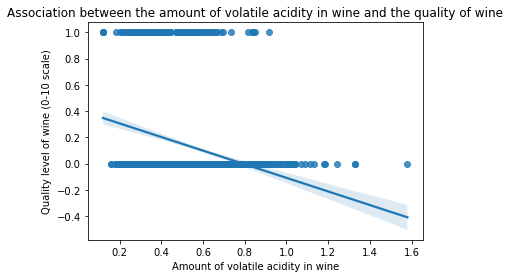

mean of the volatile acidity variable =  0.5278205128205131
mean of the volatile acidity variable after normalization =  -3.210203973955229e-16

OLS regression model for the association between the amount of volatile acidity in wine and the quality of wine:
                            OLS Regression Results                            
Dep. Variable:              quality_c   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     126.3
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           2.96e-28
Time:                        08:17:29   Log-Likelihood:                -494.64
No. Observations:                1599   AIC:                             993.3
Df Residuals:                    1597   BIC:                             1004.
Df Model:                           1                                         
Covariance Type:            non

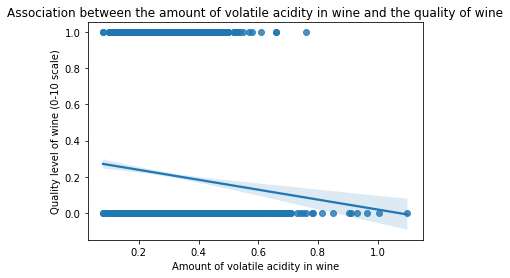

mean of the volatile acidity variable =  0.27824111882401087
mean of the volatile acidity variable after normalization =  -1.0712870180806514e-15

OLS regression model for the association between the amount of volatile acidity in wine and the quality of wine:
                            OLS Regression Results                            
Dep. Variable:              quality_c   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     22.23
Date:                Thu, 24 Mar 2022   Prob (F-statistic):           2.49e-06
Time:                        08:17:29   Log-Likelihood:                -2593.3
No. Observations:                4898   AIC:                             5191.
Df Residuals:                    4896   BIC:                             5204.
Df Model:                           1                                         
Covariance Type:            n

In [33]:
def basic_linear(wine_set):
     # recode quality into 2 groups: 0:{3,4,5,6}, 1:{7,8,9}
    recode = {3: 0, 4: 0, 5:0, 6:0, 7:1, 8:1, 9:1}
    wine_set['quality_c'] = wine_set['quality'].map(recode)
    scat0 = seaborn.regplot(x="volatile_acidity", y="quality_c", fit_reg=True, data=wine_set)
    plt.xlabel("Amount of volatile acidity in wine")
    plt.ylabel("Quality level of wine (0-10 scale)")
    plt.title("Association between the amount of volatile acidity in wine and the quality of wine")
    plt.show()

    # centering the explanatory variable by subrtacting the mean
    f_acidity_mean = wine_set["volatile_acidity"].mean()
    print("mean of the volatile acidity variable = ", f_acidity_mean)
    wine_set["volatile_acidity"] = wine_set["volatile_acidity"] - f_acidity_mean
    print("mean of the volatile acidity variable after normalization = ", wine_set["volatile_acidity"].mean())

    print ("\nOLS regression model for the association between the amount of volatile acidity in wine and the quality of wine:")
    model1 = smf.ols(formula="quality_c ~ volatile_acidity", data=wine_set)
    results1 = model1.fit()
    print(results1.summary())


call(basic_linear)

In [123]:
white.drop(['quality'] , axis = 1 , inplace=True)
red.drop(['quality'] , axis = 1 , inplace=True)

In [124]:
white['label'] = 1
red['label'] = 0

In [125]:
wine = pd.concat([white , red]).reset_index()
del wine['index']

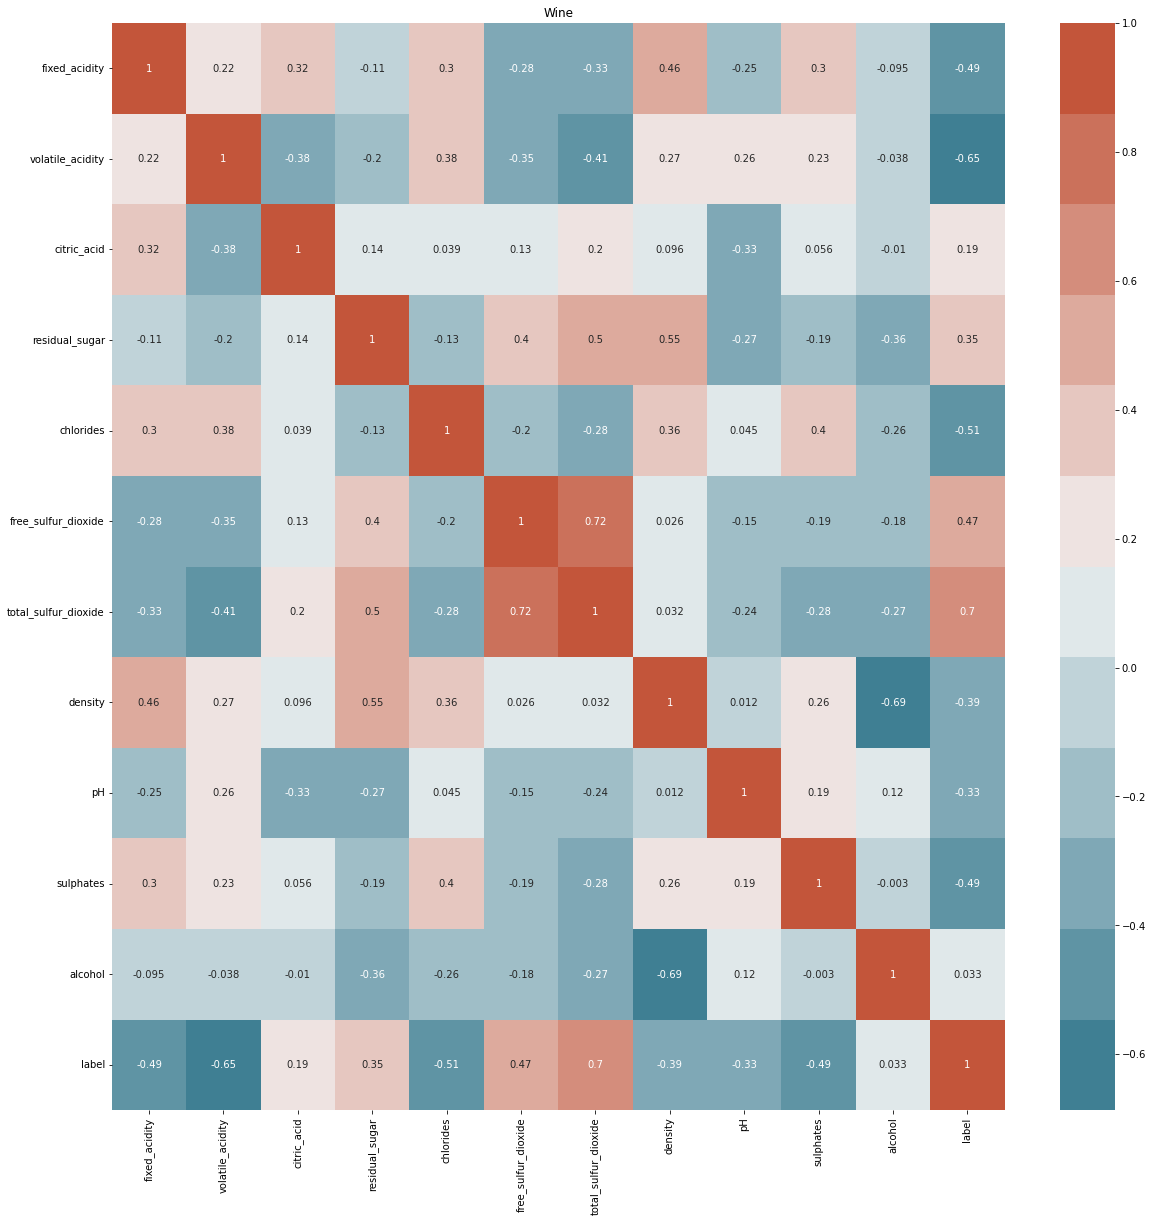

In [126]:
plt.figure(figsize=(20, 20))
df_corr = wine.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.title("Wine")
plt.show()

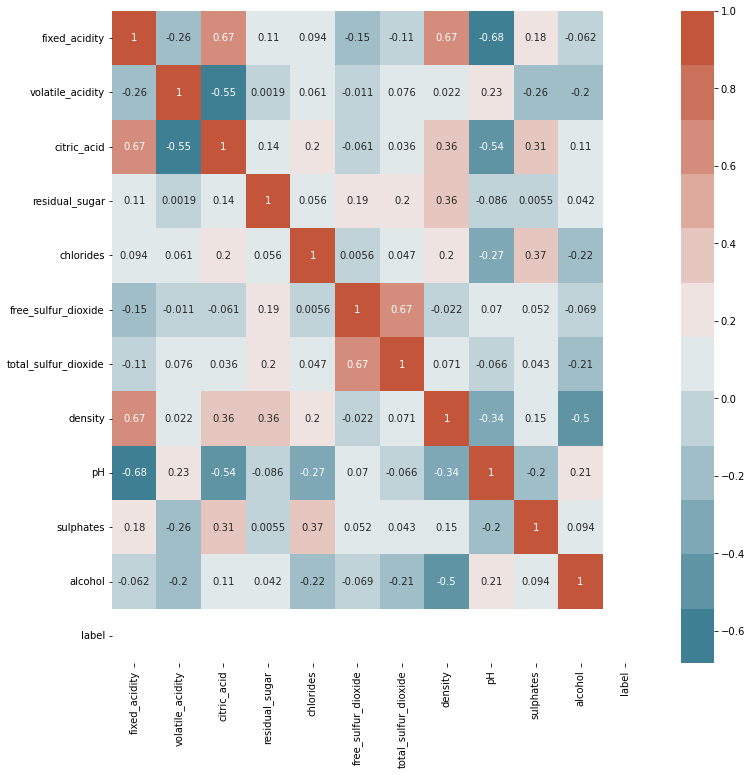

In [128]:
plt.figure(figsize=(12, 12))
df_corr = red.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.show()

Points to note:
Pairs with a considerable positive correlation are:

density and fixed acidity (Magnitude = 0.67)
citric acid and fixed acidity (Magnitude = 0.67)
pH and citric acid (Magnitude = 0.54)
free sulphur dioxide and total sulphur dioxide (Magnitude = 0.67)

Pairs with a considerable negative correlation are:
pH and fixed acidity (Magnitude = 0.-68)
Citric acid and volatile acidity (Magnitude = 0.-55)
pH and citric acid (Magnitude = 0.-54)
density and alcohol (Magnitude = 0.-50)

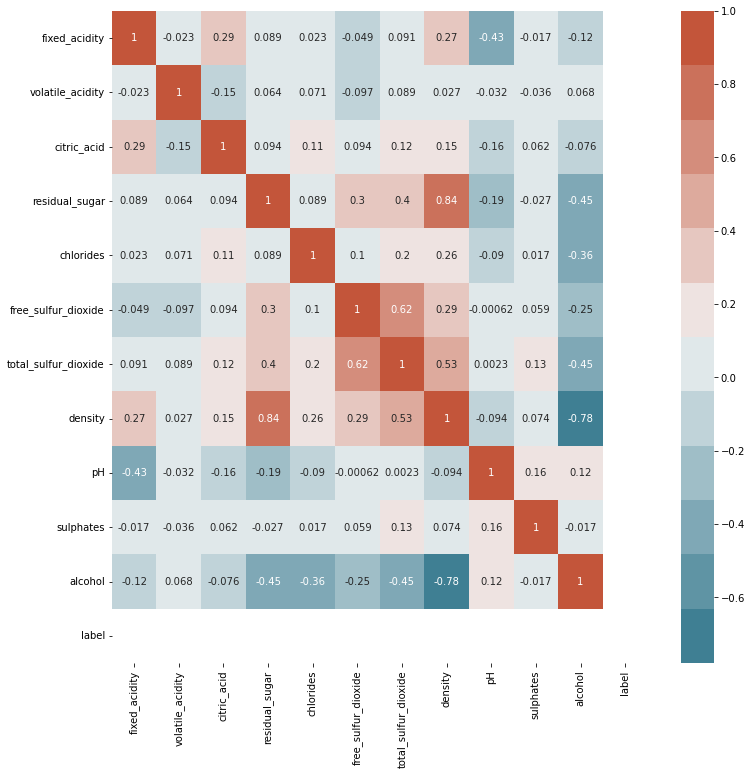

In [129]:
plt.figure(figsize=(12, 12))
df_corr = white.corr()
sns.heatmap(df_corr, cmap=sns.diverging_palette(220, 20, n=12), annot=True)
plt.show()

In [ ]:
Points to note:
Pairs with a considerable positive correlation are:
    
density and residual sugar ( Magnitude = 0.84)
total sulfur dioxide and free sulfur dioxide (Magnitude = 0.62)
density and total sulfur dioxide (Magnitude = 0.53)


Pairs with a considerable negative correlation are:

fixed acidity and ph (Magnitude -0.43)    
alchol and residual sugar  (Magnitude -0.45)
density and alcohol (Magnitude = -0.78)

In [131]:
red.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_quart', 'label'],
      dtype='object')

In [132]:
white.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality_quart', 'label'],
      dtype='object')

In [133]:
color_dict = {"white": "#FCF5DB", "red": "#BD1414"}

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [152]:
red_wine = pd.read_csv("winequality-red.csv")
white_wine = pd.read_csv("winequality-white.csv")

In [153]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [154]:
red_wine["color"]= "Red"
white_wine["color"]= "White"

In [155]:
red_wine_quality = red_wine["quality"].value_counts(normalize= True).mul(100).rename("percent").reset_index()
white_wine_quality = white_wine["quality"].value_counts(normalize= True).mul(100).rename("percent").reset_index()

'Mean quality of Red Wine is: 5.64'

'Mean quality of White Wine is: 5.88'

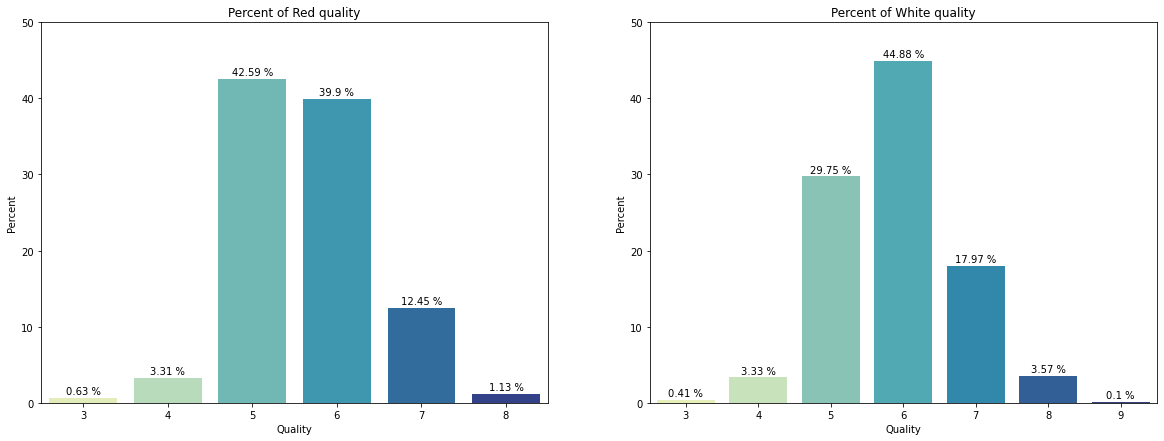

In [156]:
fig,ax = plt.subplots(1, 2, figsize= (20, 7))
red = sns.barplot(x= "index", y= "percent", data= red_wine_quality, palette= "YlGnBu", ax= ax[0])
red.set_xlabel("Quality")
red.set_ylabel("Percent")
red.set_title("Percent of Red quality")
red.set_ylim(0,50)
white = sns.barplot(x= "index", y= "percent", data= white_wine_quality, palette= "YlGnBu", ax= ax[1])
white.set_xlabel("Quality")
white.set_ylabel("Percent")
white.set_title("Percent of White quality")
white.set_ylim(0,50)
# Write mean quality 
display("Mean quality of Red Wine is: " + str(round(red_wine["quality"].mean(), 2)))
display("Mean quality of White Wine is: " + str(round(white_wine["quality"].mean(), 2)))
# Write in each bin 
for p in red.patches:
    height = p.get_height().round(2)
    text = str(height) + " %"
    red.text(p.get_x()+p.get_width()/2,height + .5,text,ha="center")
for p in white.patches:
    height = p.get_height().round(2)
    text = str(height) + " %"
    white.text(p.get_x()+p.get_width()/2,height + .5,text,ha="center")

In [158]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [159]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [160]:
acidity_levels_red_edges = [2.74, 3.21, 3.31, 3.4, 4.01]
acidity_levels_red_names = ['High', 'Higher Intermediate' , 'Intermediate', "Low"]
red_wine["acidity_levels"] = pd.cut(red_wine["pH"], acidity_levels_red_edges, labels=acidity_levels_red_names)
acidity_levels_white_edges = [2.72, 3.09, 3.18, 3.28, 3.82]
acidity_levels_white_names = ['High', 'Higher Intermediate' , 'Intermediate', "Low"]
white_wine["acidity_levels"] = pd.cut(white_wine["pH"], acidity_levels_white_edges, labels=acidity_levels_white_names)

In [161]:
white_wine_acidity_levels = white_wine.groupby("acidity_levels")["quality"].mean().reset_index()
red_wine_acidity_levels = red_wine.groupby("acidity_levels")["quality"].mean().reset_index()

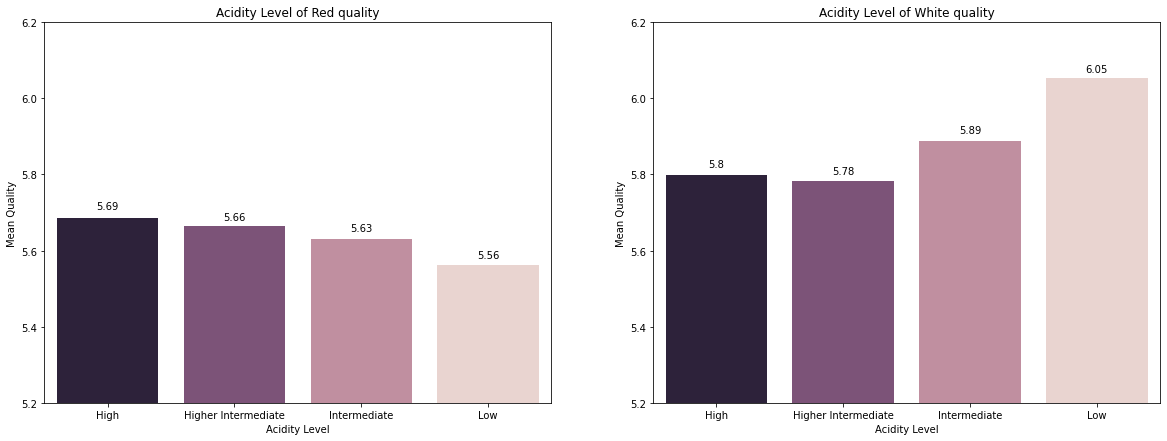

In [162]:
fig,ax = plt.subplots(1, 2, figsize= (20, 7))
red = sns.barplot(x= "acidity_levels", y= "quality", data= red_wine_acidity_levels,
                  palette= sns.cubehelix_palette(4, reverse= True), ax= ax[0])
red.set_xlabel("Acidity Level")
red.set_ylabel("Mean Quality")
red.set_title("Acidity Level of Red quality")
red.set_ylim(5.2,6.2)
white = sns.barplot(x= "acidity_levels", y= "quality", data= white_wine_acidity_levels,
                    palette= sns.cubehelix_palette(4, reverse= True), ax= ax[1])
white.set_xlabel("Acidity Level")
white.set_ylabel("Mean Quality")
white.set_title("Acidity Level of White quality")
white.set_ylim(5.2,6.2)

# Write in each bin 
for p in red.patches:
    height = p.get_height().round(2)
    text = str(height)
    red.text(p.get_x()+p.get_width()/2,height + .02,text,ha="center")
for p in white.patches:
    height = p.get_height().round(2)
    text = str(height)
    white.text(p.get_x()+p.get_width()/2,height + .02,text,ha="center")

In [163]:
alcoholic_levels_red_edges = [8.4, 9.5, 10.2, 11.1, 14.9]
alcoholic_levels_red_names = ["Low", "Intermediate", "Higher Intermediate", "High"]
red_wine["alcoholic_levels"] = pd.cut(red_wine["alcohol"], alcoholic_levels_red_edges, labels=alcoholic_levels_red_names)
alcoholic_levels_white_edges = [8, 9.5, 10.4, 11.4, 14.2]
alcoholic_levels_white_names = ["Low", "Intermediate", "Higher Intermediate", "High"]
white_wine["alcoholic_levels"] = pd.cut(white_wine["alcohol"], alcoholic_levels_white_edges, labels=alcoholic_levels_white_names)

In [164]:
white_wine_alcoholic_levels = white_wine.groupby("alcoholic_levels")["quality"].mean().reset_index()
red_wine_alcoholic_levels = red_wine.groupby("alcoholic_levels")["quality"].mean().reset_index()

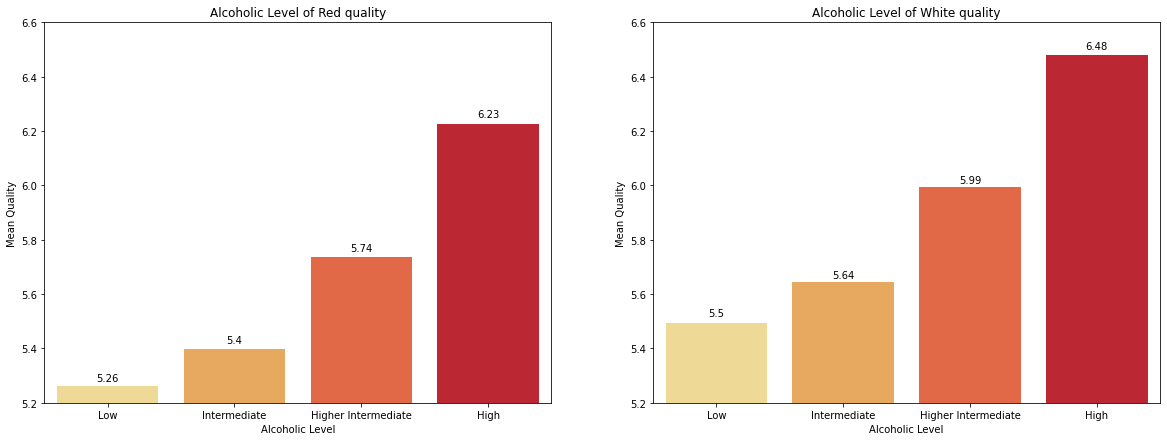

In [165]:
fig,ax = plt.subplots(1, 2, figsize= (20, 7))
red = sns.barplot(x= "alcoholic_levels", y= "quality", data= red_wine_alcoholic_levels,
                  palette= "YlOrRd", ax= ax[0])
red.set_xlabel("Alcoholic Level")
red.set_ylabel("Mean Quality")
red.set_title("Alcoholic Level of Red quality")
red.set_ylim(5.2,6.6)
white = sns.barplot(x= "alcoholic_levels", y= "quality", data= white_wine_alcoholic_levels,
                    palette= "YlOrRd", ax= ax[1])
white.set_xlabel("Alcoholic Level")
white.set_ylabel("Mean Quality")
white.set_title("Alcoholic Level of White quality")
white.set_ylim(5.2,6.6)

# Write in each bin 
for p in red.patches:
    height = p.get_height().round(2)
    text = str(height)
    red.text(p.get_x()+p.get_width()/2,height + .02,text,ha="center")
for p in white.patches:
    height = p.get_height().round(2)
    text = str(height)
    white.text(p.get_x()+p.get_width()/2,height + .02,text,ha="center")

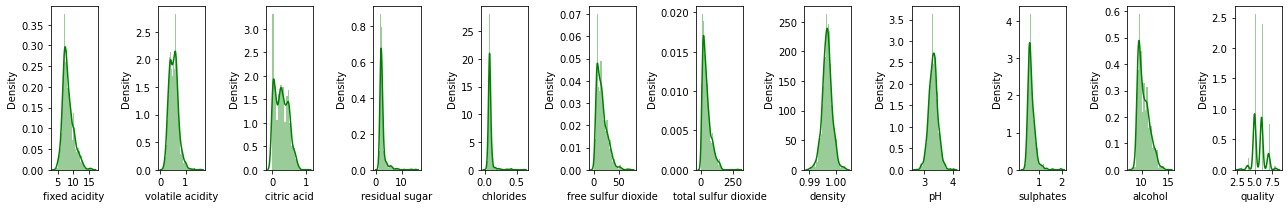

In [176]:
names_arr = df.columns.values
f, axes = plt.subplots(1, 12, figsize=(18, 3))

for i in range(12):
    sns.distplot(df[names_arr[i]], ax=axes[i], color='green')
plt.tight_layout()
plt.show()

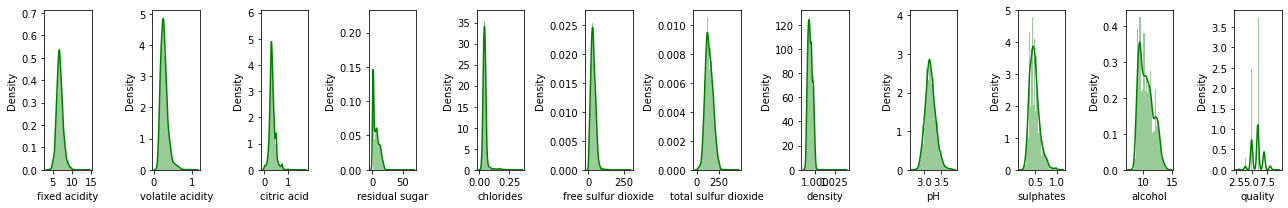

In [177]:
names_arr = white_wine.columns.values
f, axes = plt.subplots(1, 12, figsize=(18, 3))

for i in range(12):
    sns.distplot(white_wine[names_arr[i]], ax=axes[i], color='green')
plt.tight_layout()
plt.show()

In [185]:
red_wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sb
import warnings

In [193]:
# STEP 13 - SEPERATING INPUT & TARGET VARIABLES FROM DATA :

y=red_wine['quality']

x=red_wine.drop(['quality'],axis=1,inplace=False)

print(x.shape)
print(y.shape)
#Target_data

(1599, 15)
(1599,)


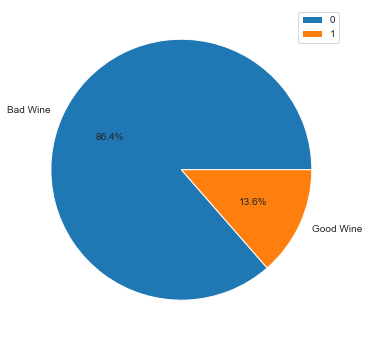

mean red wine quality =  5.6360225140712945


In [194]:
# GRADING THE WINE

red_wine['GRADE']=1

red_wine.GRADE[red_wine.quality<6.5]=0

mp.figure(figsize=(6,6))
label=red_wine.GRADE.value_counts().index
labels=['Bad Wine','Good Wine']

mp.pie(red_wine.GRADE.value_counts(),autopct='%.1f%%',labels=labels)

mp.legend(label)

mp.show()

print("mean red wine quality = ",y.mean()) 

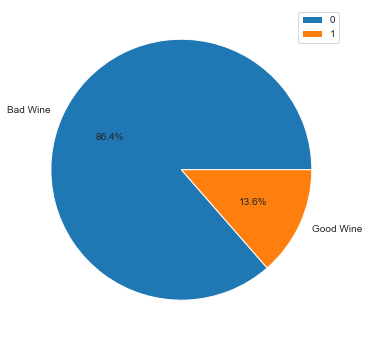

mean red wine quality =  5.6360225140712945


In [195]:
# GRADING THE WINE

white_wine['GRADE']=1

white_wine.GRADE[white_wine.quality<6.5]=0

mp.figure(figsize=(6,6))
label=white_wine.GRADE.value_counts().index
labels=['Bad Wine','Good Wine']

mp.pie(red_wine.GRADE.value_counts(),autopct='%.1f%%',labels=labels)

mp.legend(label)

mp.show()

print("mean red wine quality = ",y.mean()) 